In [8]:
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from heatmap_generator import overlay_multi_layered_cam_large_image, overlay_single_layered_cam_large_image

In [3]:
# load model
model = load_model('VGG19_trained.h5')

## Generating heatmap of specific classes (red = more confidence)

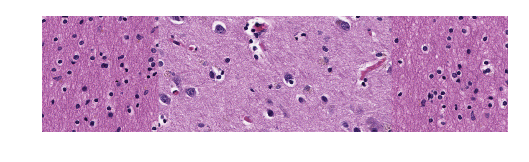

In [18]:
# image we will use
im = plt.imread('small_tiled_tissue.jpg')
plt.imshow(im)
plt.axis('off')
print('')

In [9]:
### configurations

trained_img_size = 304  # size of each tile (size our cnn was trained on)
conv_block = 'block5_conv4'  # name of the final convolutional layer (for vgg) (can view layers using model.summary())
classes = ['Blank', 'Gray Mat.', 'White Mat.']  # classes model was trained on. ordering matters
a = 0.3  # heatmap transparency

### 1. show which parts constitute gray matter

In [11]:
heatmap_class = 'Gray Mat.' # get heatmap of specified class

cam, avg_pred = overlay_single_layered_cam_large_image(model, trained_img_size, classes, im, conv_block, heatmap_class,
                                                    overlay_alpha=a)

25.00% (1/4 tiles) in 0.94s
50.00% (2/4 tiles) in 0.96s
75.00% (3/4 tiles) in 0.94s
100.00% (4/4 tiles) in 0.93s


Blank: 0.00%
Gray Mat.: 0.50%
White Mat.: 0.50%



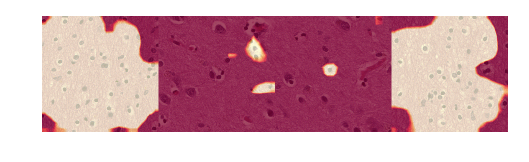

In [12]:
plt.imshow(cam)
plt.axis('off')

print(avg_pred)

### 2. show which parts constitute white matter

In [13]:
heatmap_class = 'White Mat.' # get heatmap of specified class

cam, avg_pred = overlay_single_layered_cam_large_image(model, trained_img_size, classes, im, conv_block, heatmap_class,
                                                    overlay_alpha=a)

25.00% (1/4 tiles) in 0.94s
50.00% (2/4 tiles) in 0.96s
75.00% (3/4 tiles) in 0.93s
100.00% (4/4 tiles) in 0.95s


Blank: 0.00%
Gray Mat.: 0.50%
White Mat.: 0.50%



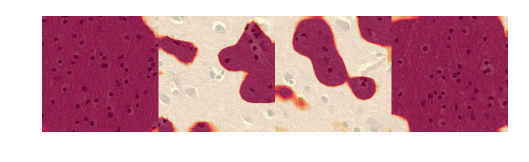

In [14]:
plt.imshow(cam)
plt.axis('off')

print(avg_pred)

### 3. show which parts constitute blank

In [15]:
heatmap_class = 'Blank' # get heatmap of specified class

cam, avg_pred = overlay_single_layered_cam_large_image(model, trained_img_size, classes, im, conv_block, heatmap_class,
                                                    overlay_alpha=a)

25.00% (1/4 tiles) in 0.94s
50.00% (2/4 tiles) in 0.97s
75.00% (3/4 tiles) in 0.95s
100.00% (4/4 tiles) in 0.96s


Blank: 0.00%
Gray Mat.: 0.50%
White Mat.: 0.50%



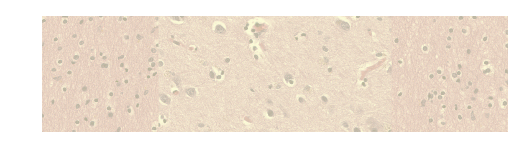

In [16]:
plt.imshow(cam)
plt.axis('off')

print(avg_pred)

## Generating heatmap of multiple classes

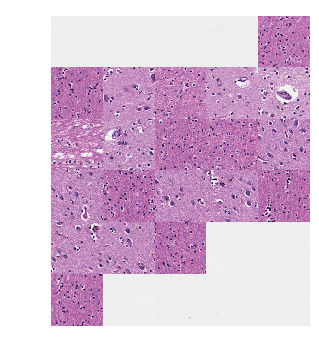

In [19]:
# image we will use
im = plt.imread('multi_tiled_tissue.jpg')
plt.imshow(im)
plt.axis('off')
print('')

In [21]:
show_top_x_classes = 3  # show all 3 classes

# get heatmap with top 3 images in each tile
cam, avg_pred = overlay_multi_layered_cam_large_image(model, trained_img_size, classes, im, conv_block, overlay_alpha=a,
                                                show_top_x_classes=show_top_x_classes)

20.00% (6/30 tiles) in 5.78s
40.00% (12/30 tiles) in 6.05s
60.00% (18/30 tiles) in 6.15s
80.00% (24/30 tiles) in 6.18s
100.00% (30/30 tiles) in 6.23s


Blank: 0.33% (Blue)
Gray Mat.: 0.33% (Green)
White Mat.: 0.34% (Red)



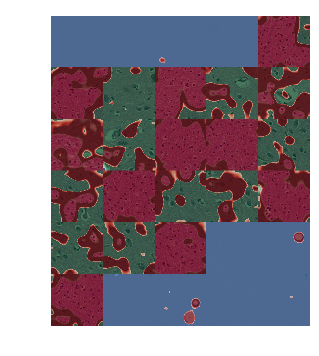

In [22]:
plt.imshow(cam)
plt.axis('off')

print(avg_pred)